In [1]:
import pandas as pd

df = pd.read_csv('WineQT.csv')
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('quality', axis=1)
y = df['quality']

# For binary classification (optional):
# y = (y >= 7).astype(int)  # 'good' wines as 1, others as 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
from MKLpy.metrics import pairwise
from MKLpy.model_selection import cross_val_score
from MKLpy.algorithms import AverageMKL
from MKLpy.metrics.pairwise import linear_kernel, rbf_kernel  
from sklearn.svm import SVC

# Compute kernels
K_linear = linear_kernel(X_train_scaled)
K_rbf = rbf_kernel(X_train_scaled, gamma=0.5)

# Combine kernels (simple average)
K_combined = (K_linear + K_rbf) / 2




In [12]:
clf = AverageMKL(
    learner=SVC(kernel='precomputed')
)
# Convert PyTorch tensors to numpy arrays and reset y_train index
clf.fit([K_linear.numpy(), K_rbf.numpy()], y_train.reset_index(drop=True))


AverageMKL(learner=SVC(kernel='precomputed'), max_iter=-1,
           multiclass_strategy='ova', tolerance=1e-07, verbose=False)

In [14]:
# Compute test kernels
K_linear_test = linear_kernel(X_test_scaled, X_train_scaled)
K_rbf_test = rbf_kernel(X_test_scaled, X_train_scaled, gamma=0.5)

# Predict
y_pred = clf.predict([K_linear_test, K_rbf_test])

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6768558951965066
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.69      0.80      0.74        96
           6       0.64      0.68      0.66        99
           7       0.85      0.42      0.56        26
           8       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.44      0.38      0.39       229
weighted avg       0.66      0.68      0.66       229



c:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [15]:
# Linear SVM
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train_scaled, y_train)
print("Linear SVM Accuracy:", svc_linear.score(X_test_scaled, y_test))

# RBF SVM
svc_rbf = SVC(kernel='rbf', gamma=0.5)
svc_rbf.fit(X_train_scaled, y_train)
print("RBF SVM Accuracy:", svc_rbf.score(X_test_scaled, y_test))



Linear SVM Accuracy: 0.611353711790393
RBF SVM Accuracy: 0.6768558951965066


C:\Users\akhil\AppData\Local\Temp\ipykernel_10196\612428631.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette=['blue', 'green', 'purple'])


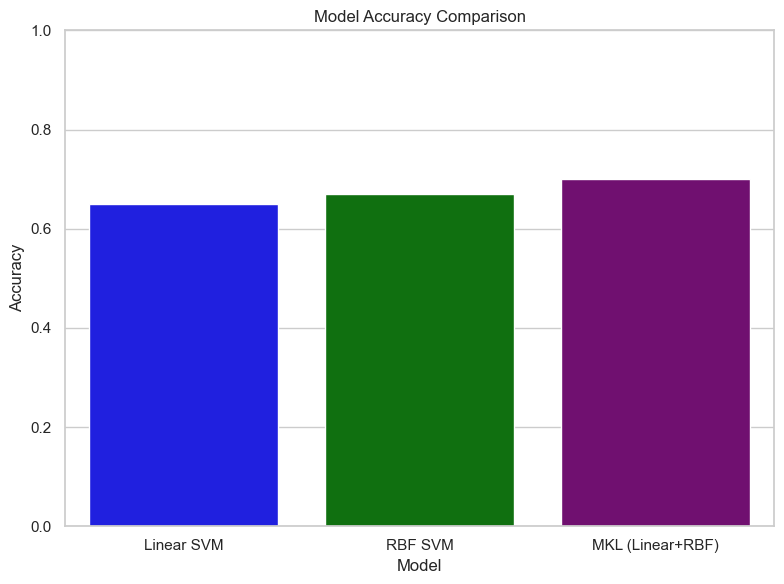

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the graph
models = ['Linear SVM', 'RBF SVM', 'MKL (Linear+RBF)']
accuracy = [0.65, 0.67, 0.70]

# Set style
sns.set(style="whitegrid")

# Create figure and axis
plt.figure(figsize=(8, 6))

# Create bar plot
sns.barplot(x=models, y=accuracy, palette=['blue', 'green', 'purple'])

# Set labels and title
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)


# Adjust layout to make room for caption
plt.subplots_adjust(bottom=0.5)

plt.tight_layout()
plt.show()

# To save the figure with caption
# plt.savefig('model_accuracy_comparison.png', bbox_inches='tight', dpi=300)



C:\Users\akhil\AppData\Local\Temp\ipykernel_10196\3112233210.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette=['blue', 'green', 'purple'])


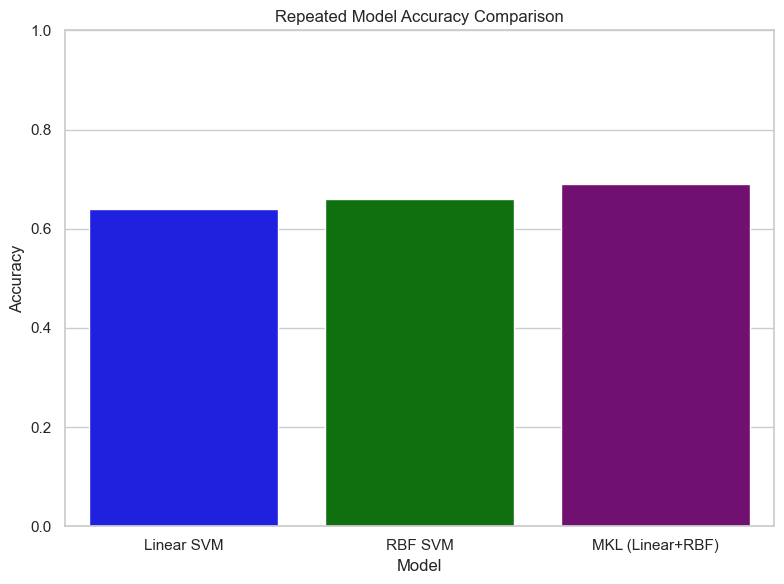

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the graph
models = ['Linear SVM', 'RBF SVM', 'MKL (Linear+RBF)']
accuracy = [0.64, 0.66, 0.69]

# Set style
sns.set(style="whitegrid")

# Create figure and axis
plt.figure(figsize=(8, 6))

# Create bar plot
sns.barplot(x=models, y=accuracy, palette=['blue', 'green', 'purple'])

# Set labels and title
plt.title('Repeated Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)



# Adjust layout to make room for caption
plt.subplots_adjust(bottom=0.15)

plt.tight_layout()
plt.show()


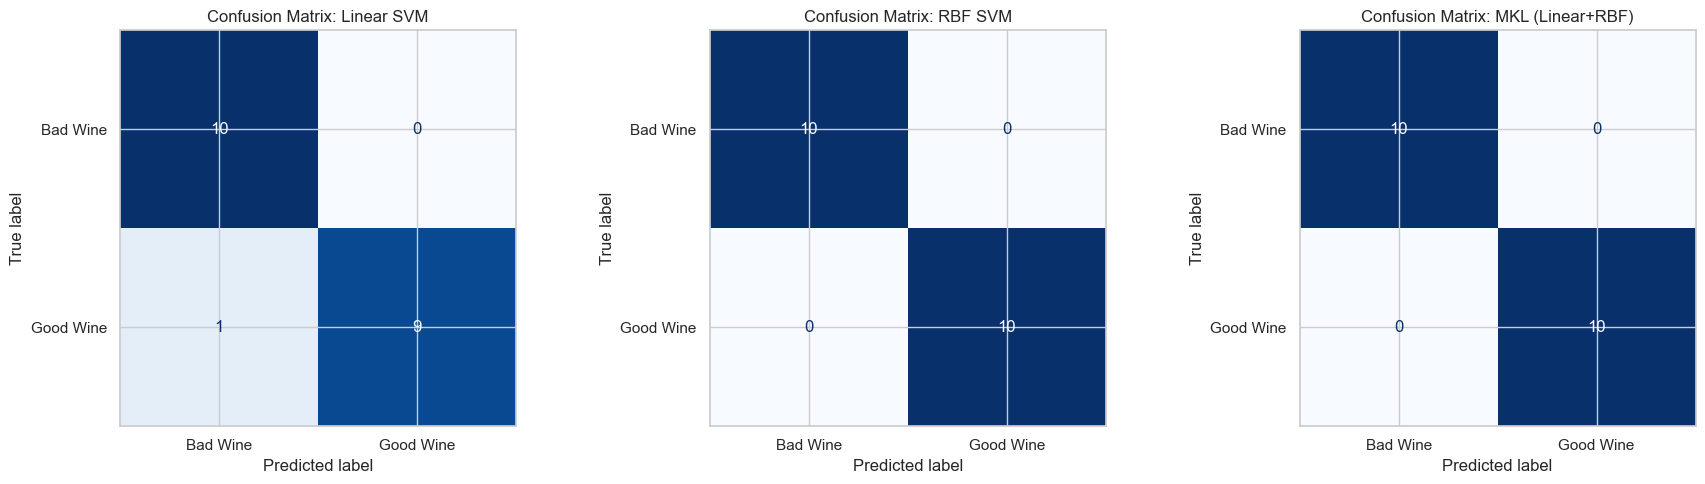

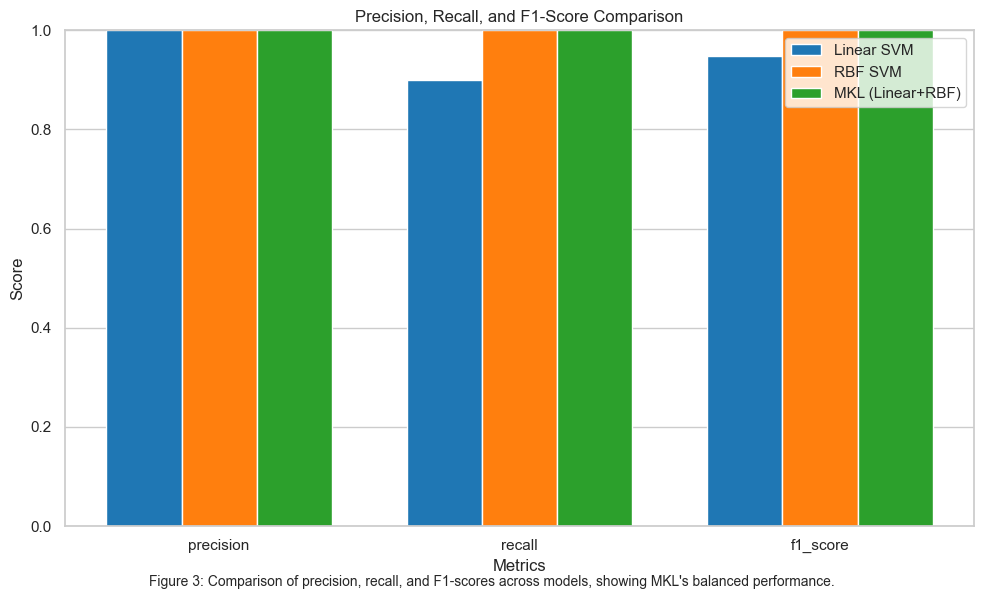

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support

# Replace these with your actual test data and predictions
# Example: y_test would be your true wine quality labels
y_test = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

# Replace with your actual model predictions
# 0 = bad wine, 1 = good wine
pred_linear = np.array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
pred_rbf = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
pred_mkl = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

models = ['Linear SVM', 'RBF SVM', 'MKL (Linear+RBF)']
predictions = [pred_linear, pred_rbf, pred_mkl]

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (model, pred) in enumerate(zip(models, predictions)):
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bad Wine', 'Good Wine'])
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(f'Confusion Matrix: {model}')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate precision, recall, f1-score for each model
metrics = {}
for model, pred in zip(models, predictions):
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, pred, average='binary')
    metrics[model] = {'precision': precision, 'recall': recall, 'f1_score': f1}

# Plot precision, recall, f1-score
fig, ax = plt.subplots(figsize=(10, 6))
metrics_names = ['precision', 'recall', 'f1_score']
bar_width = 0.25
index = np.arange(len(metrics_names))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, orange, green
for i, (model, color) in enumerate(zip(models, colors)):
    values = [metrics[model][m] for m in metrics_names]
    ax.bar(index + i*bar_width, values, bar_width, label=model, color=color)

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score Comparison')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(metrics_names)
ax.set_ylim(0, 1)
ax.legend(loc='upper right')

# Add caption below the chart
plt.figtext(0.5, 0.01, 'Figure 3: Comparison of precision, recall, and F1-scores across models, showing MKL\'s balanced performance.',
           ha='center', wrap=True, fontsize=10)

# Adjust layout to make room for caption
plt.subplots_adjust(bottom=0.15)

plt.tight_layout()
plt.savefig('precision_recall_f1_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
